In [2]:
import os
import time
import datetime

import numpy as np
import gymnasium as gym
from gymnasium.experimental.wrappers import RecordVideoV0
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback

from er_mrl.wrappers import ReservoirWrapper, CollectObs_Wrapper, CollectContext_Wrapper
from er_mrl.utils import plot_results


In [4]:
# Experiment parameters
env_id = 'Swimmer-v4'
nb_seeds = 3
training_timesteps = 1_000_000
models = ['PPO', 'RES_PPO']

# Reservoir hyperparameters
best_params = {'iss': 0.5094967001909093, 'sr': 0.5107980772147591, 'lr': 0.19038764062731478, 'units': 100}
reset_res = True
skip_c = False

In [5]:
# Create the saving directories
h_test = 'CPG_test'

exp_name = f"{env_id}_{h_test}"
logdir = f"logs/{exp_name}/"
models_dir = f"models/{exp_name}/"
files_dir = f"{h_test}_files"

os.makedirs(logdir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(files_dir, exist_ok=True)

In [10]:
# Training procedure with the chosen parameters (env_id, nb_seeds ...)
start = time.time()

for seed in range(nb_seeds):
        for i, model_name in enumerate(models):

                checkpoint_callback = CheckpointCallback(
                                                save_freq=10000,
                                                save_path=models_dir,
                                                name_prefix=f"{model_name}_seed_{seed}"
                                                )

                env = gym.make(env_id, render_mode="rgb_array")
                env = CollectObs_Wrapper(env)
                
                if model_name.startswith('RES'):
                        env = ReservoirWrapper(env, seed=seed, reset_res=reset_res, skip_c=skip_c, **best_params)
                        env = CollectContext_Wrapper(env)
                
                # Record the video of agents
                env = RecordVideoV0(env, video_folder=f"Swimmer-v4_{h_test}/seed_{seed}", episode_trigger = lambda x: x % 25 == 0 and x <600, name_prefix=f"{model_name}_seed_{seed}")

                
                model = PPO('MlpPolicy', env, verbose=0, tensorboard_log=logdir, seed=seed)
                model.learn(total_timesteps=training_timesteps, tb_log_name=f"{model_name}_{int(training_timesteps/1000)}k_steps_seed_{seed}")
                model.save(f"{models_dir}/{model_name}_{int(training_timesteps/1000)}k_steps_seed_{seed}")
                
                # Save observations
                obs_file = f"{model_name}_obs_seed_{seed}.npy"
                observation_history = np.array(env.observations_history)
                np.save(os.path.join(files_dir, obs_file), observation_history)
                
                if model_name.startswith('RES'):
                        # Save reservoir context
                        context_history = np.array(env.contexts_history)
                        context_file = f"{model_name}_context_seed_{seed}.npy"
                        np.save(os.path.join(files_dir, context_file), context_history)

                        # Save ER-MRL agent action
                        action_file = f"{model_name}_res_ppo_action_seed_{seed}.npy"
                        action_history = np.array(env.actions_history)
                        np.save(os.path.join(files_dir, action_file), action_history)
                else:
                        # Save classical RL agent action
                        action_file = f"{model_name}_ppo_action_seed_{seed}.npy"
                        action_history = np.array(env.actions_history)
                        np.save(os.path.join(files_dir, action_file), action_history)

        print(f"Seed {seed} done")

end = time.time()
print(f"Training done in {str(datetime.timedelta(seconds=end-start))}")

truncated_history = np.array(env.truncated_history)
dones = np.squeeze(np.where(truncated_history == True))

file_name = "dones.npy"
np.save(os.path.join(files_dir, file_name), dones)

Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-0.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-0.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-25.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-25.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-50.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-50.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-75.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-75.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-100.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-100.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-100.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-125.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-125.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-125.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-150.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-150.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-150.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-175.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-175.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-175.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-200.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-200.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-200.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-225.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-225.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-225.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-250.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-250.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-250.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-275.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-275.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-275.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-300.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-300.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-300.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-325.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-325.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-325.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-350.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-350.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-350.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-375.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-375.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-375.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-400.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-400.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-400.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-425.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-425.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-425.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-450.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-450.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-450.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-475.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-475.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-475.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-500.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-500.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-500.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-525.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-525.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-525.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-550.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-550.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-550.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-575.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-575.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/PPO_seed_0-episode-575.mp4


/home/flowers/.local/lib/python3.10/site-packages/gymnasium/experimental/wrappers/rendering.py:169: UserWarning: WARN: Overwriting existing videos at /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-0.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-0.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-25.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-25.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-50.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-50.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-75.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-75.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-100.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-100.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-100.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-125.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-125.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-125.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-150.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-150.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-150.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-175.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-175.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-175.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-200.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-200.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-200.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-225.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-225.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-225.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-250.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-250.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-250.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-275.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-275.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-275.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-300.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-300.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-300.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-325.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-325.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-325.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-350.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-350.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-350.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-375.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-375.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-375.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-400.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-400.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-400.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-425.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-425.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-425.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-450.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-450.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-450.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-475.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-475.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-475.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-500.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-500.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-500.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-525.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-525.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-525.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-550.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-550.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-550.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-575.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-575.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_0/RES_PPO_seed_0-episode-575.mp4
Seed 0 done
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-0.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-0.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-25.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-25.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-50.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-50.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-75.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-75.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-100.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-100.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-100.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-125.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-125.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-125.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-150.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-150.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-150.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-175.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-175.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-175.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-200.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-200.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-200.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-225.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-225.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-225.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-250.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-250.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-250.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-275.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-275.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-275.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-300.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-300.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-300.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-325.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-325.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-325.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-350.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-350.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-350.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-375.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-375.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-375.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-400.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-400.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-400.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-425.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-425.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-425.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-450.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-450.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-450.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-475.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-475.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-475.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-500.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-500.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-500.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-525.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-525.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-525.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-550.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-550.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-550.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-575.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-575.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/PPO_seed_1-episode-575.mp4


/home/flowers/.local/lib/python3.10/site-packages/gymnasium/experimental/wrappers/rendering.py:169: UserWarning: WARN: Overwriting existing videos at /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-0.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-0.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-25.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-25.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-50.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-50.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-75.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-75.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-100.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-100.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-100.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-125.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-125.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-125.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-150.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-150.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-150.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-175.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-175.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-175.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-200.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-200.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-200.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-225.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-225.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-225.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-250.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-250.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-250.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-275.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-275.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-275.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-300.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-300.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-300.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-325.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-325.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-325.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-350.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-350.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-350.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-375.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-375.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-375.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-400.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-400.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-400.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-425.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-425.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-425.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-450.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-450.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-450.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-475.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-475.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-475.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-500.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-500.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-500.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-525.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-525.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-525.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-550.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-550.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-550.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-575.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-575.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_1/RES_PPO_seed_1-episode-575.mp4
Seed 1 done
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-0.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-0.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-25.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-25.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-50.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-50.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-75.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-75.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-100.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-100.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-100.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-125.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-125.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-125.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-150.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-150.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-150.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-175.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-175.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-175.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-200.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-200.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-200.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-225.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-225.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-225.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-250.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-250.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-250.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-275.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-275.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-275.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-300.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-300.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-300.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-325.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-325.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-325.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-350.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-350.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-350.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-375.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-375.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-375.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-400.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-400.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-400.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-425.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-425.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-425.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-450.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-450.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-450.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-475.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-475.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-475.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-500.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-500.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-500.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-525.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-525.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-525.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-550.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-550.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-550.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-575.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-575.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/PPO_seed_2-episode-575.mp4


/home/flowers/.local/lib/python3.10/site-packages/gymnasium/experimental/wrappers/rendering.py:169: UserWarning: WARN: Overwriting existing videos at /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-0.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-0.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-25.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-25.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-50.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-50.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-75.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-75.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-100.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-100.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-100.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-125.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-125.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-125.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-150.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-150.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-150.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-175.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-175.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-175.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-200.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-200.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-200.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-225.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-225.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-225.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-250.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-250.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-250.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-275.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-275.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-275.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-300.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-300.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-300.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-325.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-325.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-325.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-350.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-350.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-350.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-375.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-375.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-375.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-400.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-400.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-400.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-425.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-425.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-425.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-450.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-450.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-450.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-475.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-475.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-475.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-500.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-500.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-500.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-525.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-525.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-525.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-550.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-550.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-550.mp4
Moviepy - Building video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-575.mp4.
Moviepy - Writing video /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-575.mp4



Moviepy - Done !
Moviepy - video ready /home/flowers/Desktop/python/tests/Swimmer-v4_CPG_test/seed_2/RES_PPO_seed_2-episode-575.mp4
Seed 2 done
Training done in 1:49:15.856102


In [11]:
for seed in range(nb_seeds):
    print(f"\nseed {seed}")
    for model_name in models:
        print(f"{model_name}")
        obs_file = f"{model_name}_obs_seed_{seed}.npy"
        loaded_obs_file = np.load(os.path.join(files_dir, obs_file))
        print(f"obs shape: {loaded_obs_file.shape}")
        if model_name.startswith('RES'):
            context_file = f"{model_name}_context_seed_{seed}.npy"
            loaded_ctx_file = np.load(os.path.join(files_dir, context_file))
            print(f"ctx shape: {loaded_ctx_file.shape}")
            action_file = f"{model_name}_res_ppo_action_seed_{seed}.npy"
            loaded_action_file = np.load(os.path.join(files_dir, action_file))
            print(f"action shape: {loaded_action_file.shape}")
        else:
            action_file = f"{model_name}_ppo_action_seed_{seed}.npy"
            loaded_action_file = np.load(os.path.join(files_dir, action_file))
            print(f"action shape: {loaded_action_file.shape}")



seed 0
PPO
obs shape: (1001472, 8)
action shape: (1001472, 2)
RES_PPO
obs shape: (1001472, 8)
ctx shape: (1001472, 100)
action shape: (1001472, 2)

seed 1
PPO
obs shape: (1001472, 8)
action shape: (1001472, 2)
RES_PPO
obs shape: (1001472, 8)
ctx shape: (1001472, 100)
action shape: (1001472, 2)

seed 2
PPO
obs shape: (1001472, 8)
action shape: (1001472, 2)
RES_PPO
obs shape: (1001472, 8)
ctx shape: (1001472, 100)
action shape: (1001472, 2)


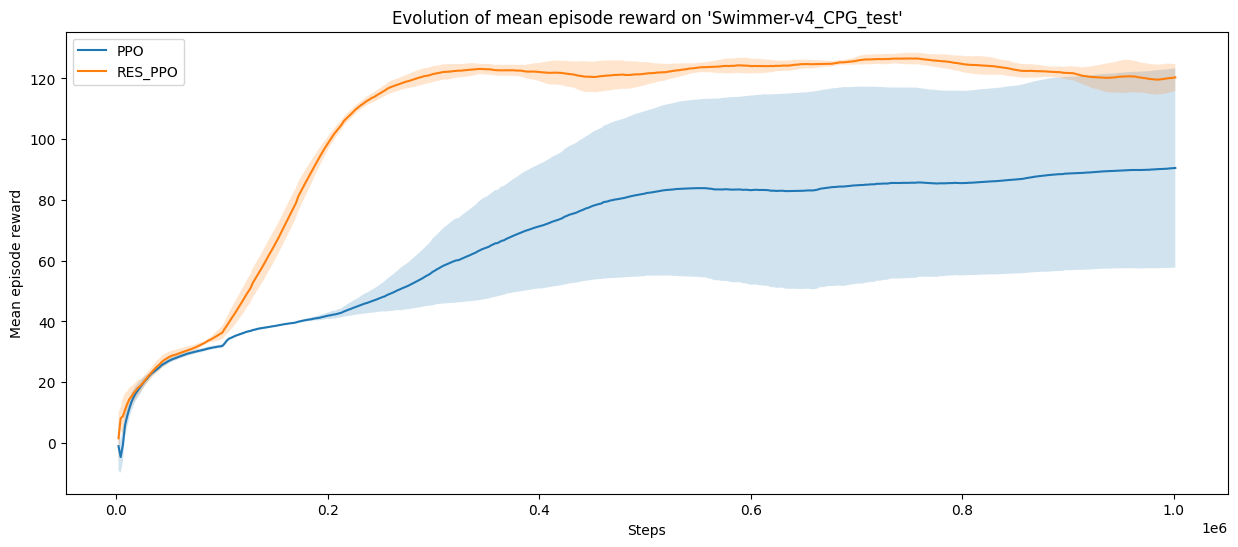

In [17]:
plot_results(exp_name, logdir, models, nb_seeds=3)